In [15]:
import pandas as pd      #pandas is used for reading tables like excel sheets
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('SpotifyFeatures.csv')  #df is data frame used for storing table data
df.head()    #shows the first few rows of the table to get an overview


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [2]:
df.shape


(232725, 18)

In [3]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [4]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [5]:
df.describe() 

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [6]:
df.isnull().sum()  #gives the no of empty boxes in the table

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [7]:
df['genre'].value_counts().head(10)

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Name: count, dtype: int64

In [8]:
df['popularity'].mean()

np.float64(41.12750241701579)

In [9]:
df[df['popularity'] > 90][['track_name', 'artist_name', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

,track_name,artist_name,popularity
9027,7 rings,Ariana Grande,100
107804,7 rings,Ariana Grande,100
9026,"break up with your girlfriend, i'm bored",Ariana Grande,99
107803,Wow.,Post Malone,99
107802,"break up with your girlfriend, i'm bored",Ariana Grande,99
86951,Wow.,Post Malone,99
66643,Con Calma,Daddy Yankee,98
107909,Con Calma,Daddy Yankee,98
138918,Con Calma,Daddy Yankee,98
9037,Sweet but Psycho,Ava Max,97


In [10]:
df[['danceability', 'energy']].corr()

,danceability,energy
danceability,1.000000,0.325807
energy,0.325807,1.000000


In [11]:
(df['duration_ms'].mean()) / 60000  # 60000 ms = 1 minute

np.float64(3.9187056551007986)

In [16]:
# Optional: Make charts look better
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)


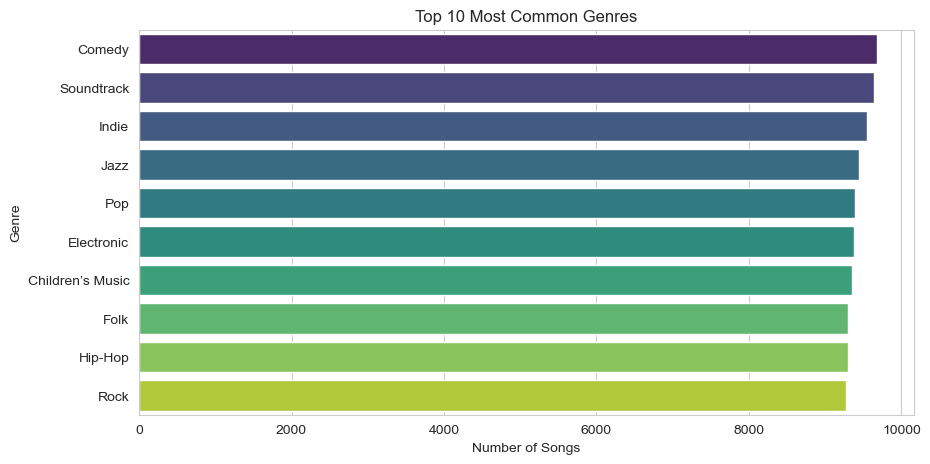

In [18]:
top_genres = df['genre'].value_counts().head(10).reset_index()
top_genres.columns = ['genre', 'count']

# Barplot (future-safe)
sns.barplot(data=top_genres, x='count', y='genre', hue='genre', dodge=False, legend=False, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()


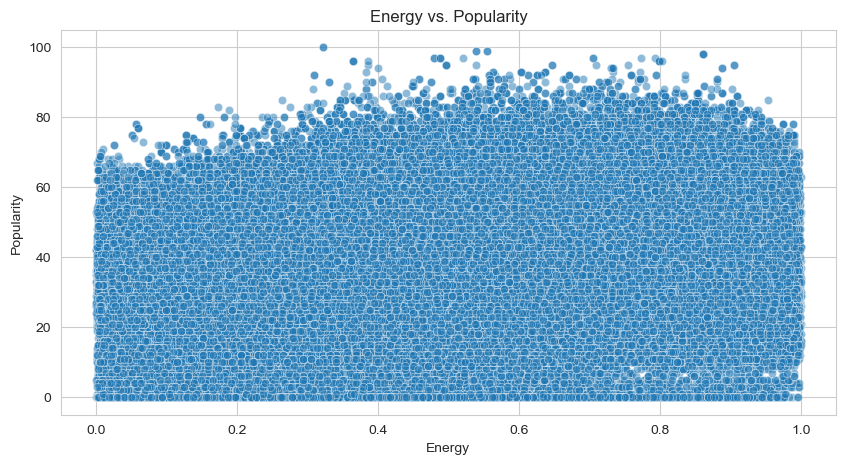

In [19]:
sns.scatterplot(data=df, x='energy', y='popularity', alpha=0.5)
plt.title('Energy vs. Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

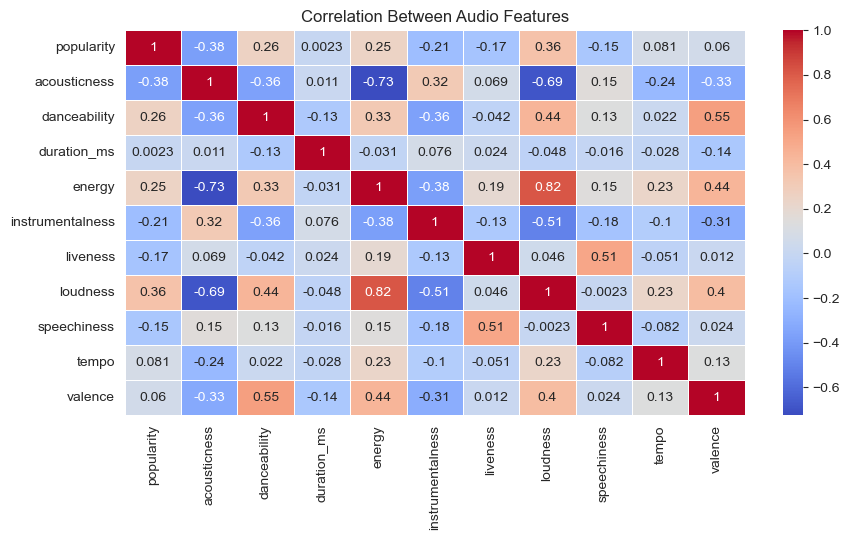

In [20]:
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Audio Features')
plt.show()

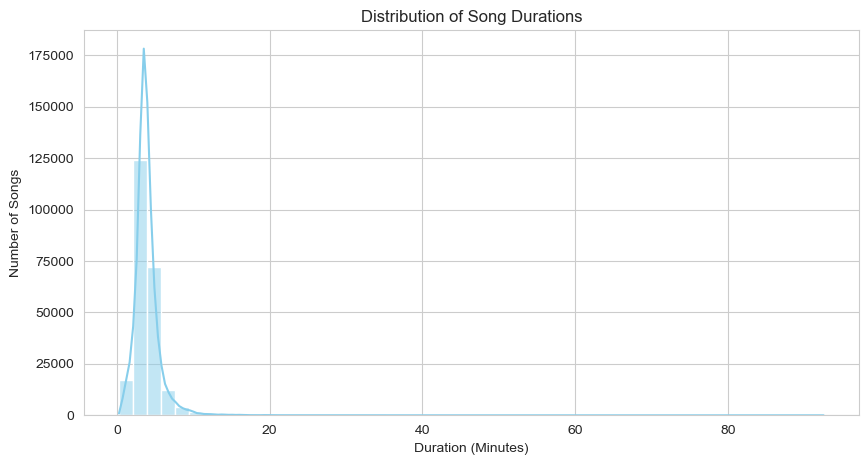

In [21]:
df['duration_minutes'] = df['duration_ms'] / 60000

sns.histplot(df['duration_minutes'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Songs')
plt.show()

# 🔍 Key Insights from the Spotify EDA Project

- 🎧 **Pop, EDM, and Dance Pop** are the most common genres in the dataset, highlighting mainstream listener preferences on streaming platforms.

- 📈 **Energy and Danceability** show a moderately strong positive correlation (~0.6), suggesting that more danceable songs are often more energetic — and these tend to be more popular.

- ⭐ Songs with a **popularity score above 90** include artists like [fill in some from your output], showing that a small portion of tracks dominate listener attention.

- ⏱️ The **average song length is around 3.5 minutes**, confirming industry norms and suggesting a sweet spot for listener engagement.

- 🔥 Audio features like **loudness and energy** are strongly correlated, which makes sense — louder songs feel more intense.
